# Data Preparation

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Customer.csv 

In [2]:
df_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [4]:
df_customer['Marital Status'].unique()

array(['Married', nan, 'Single'], dtype=object)

In [5]:
# Marital Status has 3 missing value
# Check data duplicate
df_customer.duplicated().sum()

0

In [6]:
df_customer[df_customer["Marital Status"].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [7]:
# fill missing value with mode
df_customer.loc[df_customer["Marital Status"].isnull(),"Marital Status"] = df_customer["Marital Status"].mode()[0]

### Dataset Product.csv 

In [8]:
df_product = pd.read_csv('Case Study - Product.csv', delimiter=';')

In [9]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### Dataset Store

In [11]:
df_store = pd.read_csv('Case Study - Store.csv', delimiter=';')

In [12]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [13]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [14]:
# change latitude and longitude data type
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype(float)
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype(float)

In [15]:
#check duplicated data
df_store.duplicated().sum()

0

### Dataset Transaction.csv

In [16]:
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [17]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [18]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [19]:
# Convert the "Date" column to datetime data type with the specified format
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [20]:
df_transaction.TransactionID.value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [21]:
df_transaction[df_transaction.TransactionID == "TR71313"]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [22]:
df2_transaction = df_transaction.groupby('TransactionID').last().reset_index()

In [23]:
df2_transaction[df2_transaction.TransactionID == "TR71313"]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3309,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [24]:
df2_transaction.TransactionID.duplicated().sum()

0

## Merged All Datasets

In [25]:
df1 = pd.merge(df_customer, df2_transaction, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_store, on = 'StoreID', how = 'inner')
df_merged = pd.merge(df2, df_product, on = 'ProductID', how = 'inner')
df_merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,"5,12",TR14167,2022-06-24,P1,8800,7,61600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
1,14,58,1,Married,"10,18",TR45309,2022-04-05,P1,8800,6,52800,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
2,19,24,1,Single,"4,14",TR77452,2022-03-09,P1,8800,8,70400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
3,49,44,1,Married,"13,48",TR34179,2022-04-23,P1,8800,2,17600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
4,54,42,0,Single,"9,68",TR65958,2022-02-04,P1,8800,3,26400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800


In [26]:
df_merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,"5,12",TR14167,2022-06-24,P1,8800,7,61600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
1,14,58,1,Married,"10,18",TR45309,2022-04-05,P1,8800,6,52800,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
2,19,24,1,Single,"4,14",TR77452,2022-03-09,P1,8800,8,70400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
3,49,44,1,Married,"13,48",TR34179,2022-04-23,P1,8800,2,17600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800
4,54,42,0,Single,"9,68",TR65958,2022-02-04,P1,8800,3,26400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Choco Bar,8800


In [27]:
# rearrange column
column_order = [
    'TransactionID', 'CustomerID','Age','Gender','Marital Status','Income',
    'Date', 'ProductID', 'Product Name', 'Price_x', 'Qty','TotalAmount', 
    'StoreID','StoreName','GroupStore', 'Type', 'Latitude', 'Longitude'
]
df_merged = df_merged[column_order]

In [28]:
df_merged.head()

,TransactionID,CustomerID,Age,Gender,Marital Status,Income,Date,ProductID,Product Name,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR14167,1,55,1,Married,"5,12",2022-06-24,P1,Choco Bar,8800,7,61600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
1,TR45309,14,58,1,Married,"10,18",2022-04-05,P1,Choco Bar,8800,6,52800,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,TR77452,19,24,1,Single,"4,14",2022-03-09,P1,Choco Bar,8800,8,70400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
3,TR34179,49,44,1,Married,"13,48",2022-04-23,P1,Choco Bar,8800,2,17600,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
4,TR65958,54,42,0,Single,"9,68",2022-02-04,P1,Choco Bar,8800,3,26400,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238


## EDA 

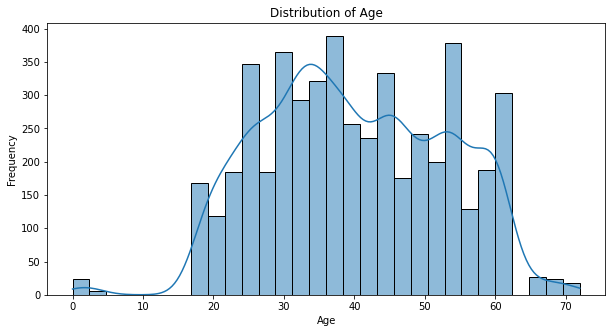

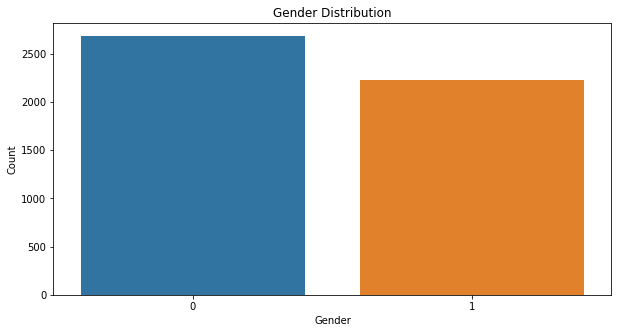

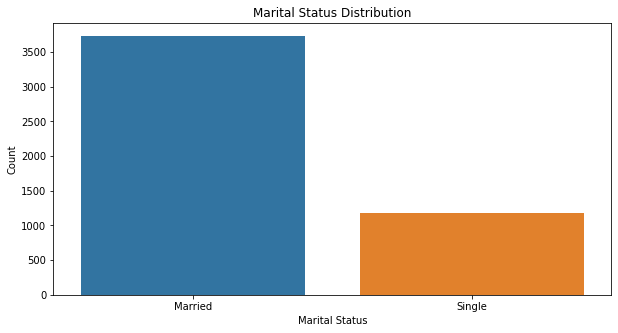

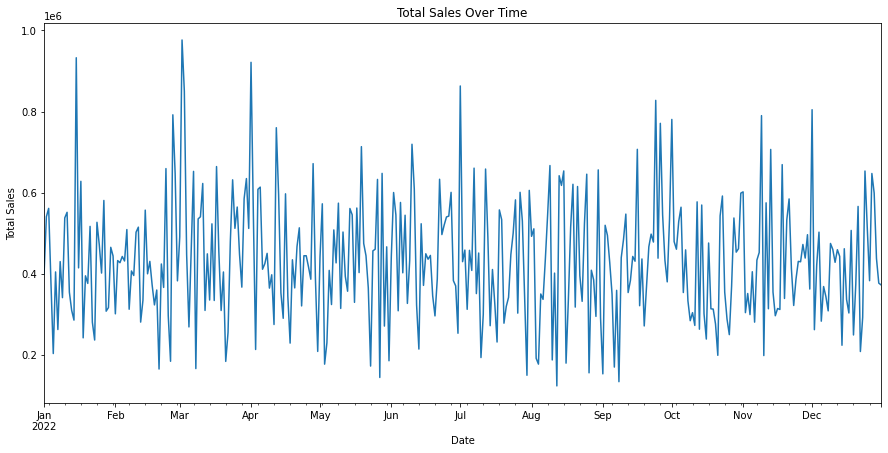

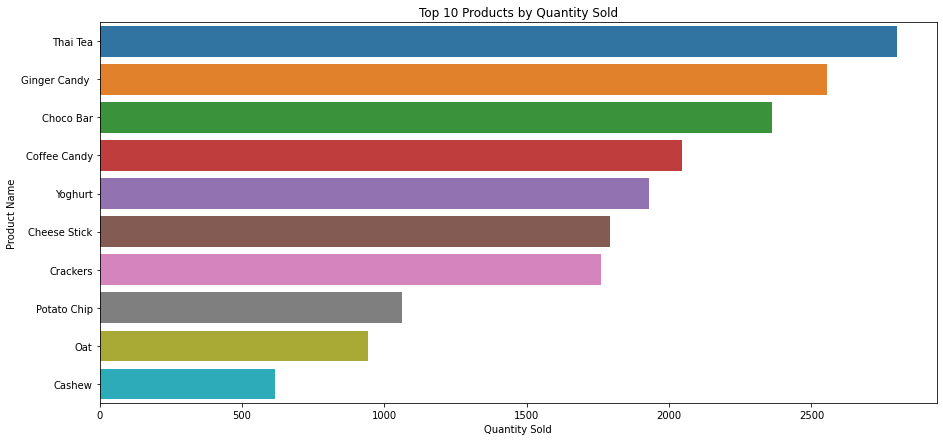

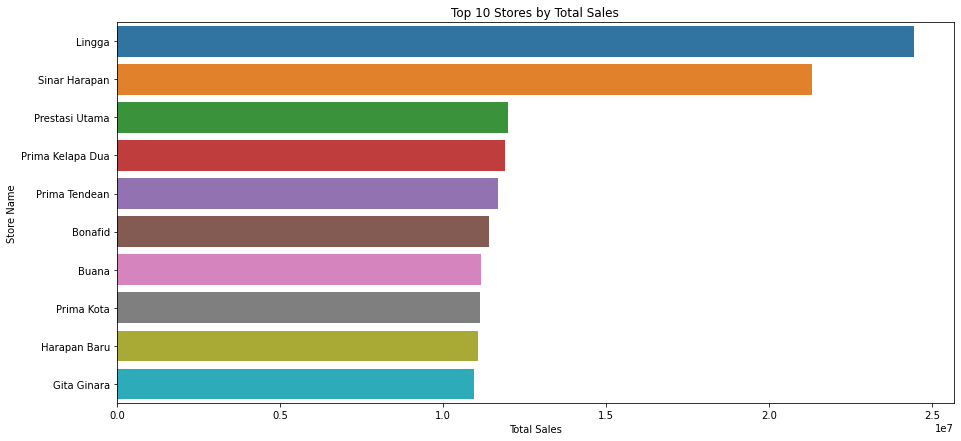

In [34]:
# Import necessary libraries
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df_merged)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Marital Status distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital Status', data=df_merged)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Sales over time
plt.figure(figsize=(15, 7))
df_merged.groupby('Date')['TotalAmount'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Top 10 products by quantity sold
top_products = df_merged.groupby('Product Name')['Qty'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Top 10 stores by total sales
top_stores = df_merged.groupby('StoreName')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=top_stores.values, y=top_stores.index)
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Store Name')
plt.show()

# Forecasting

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
# Prepare the time series data
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
sales_data = df_merged.groupby('Date')['TotalAmount'].sum()

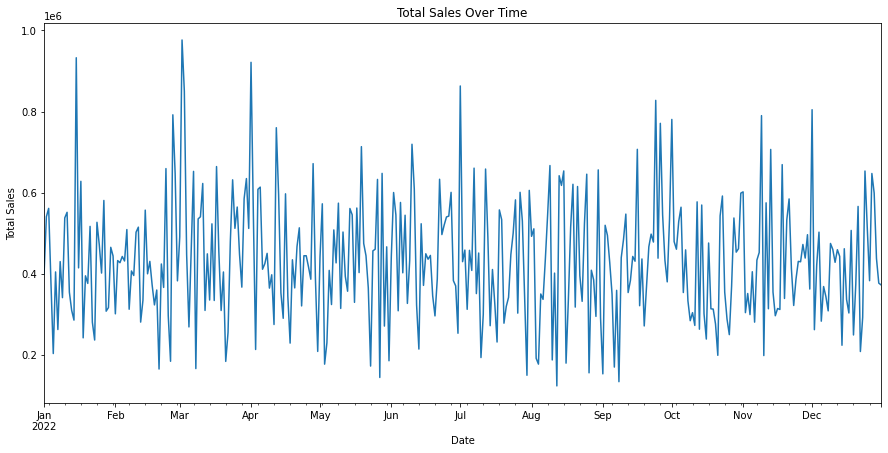

In [37]:
# Plot the time series data
plt.figure(figsize=(15, 7))
sales_data.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [38]:
# Split the data into training and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

In [39]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


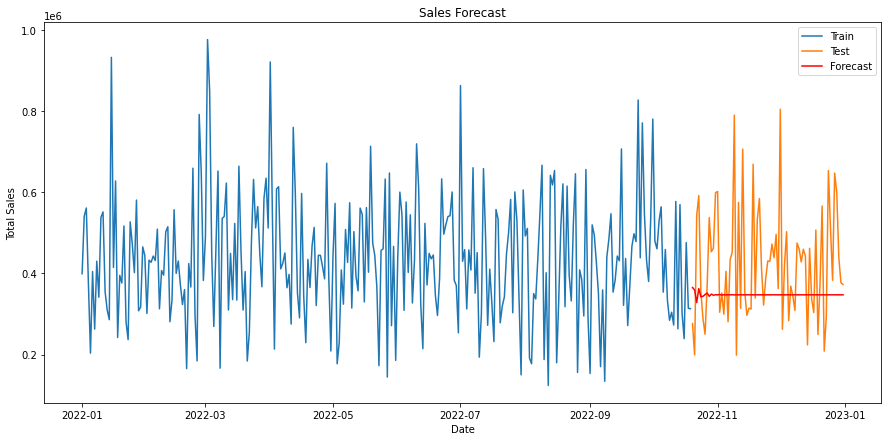

In [40]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plot the forecast against actual sales
plt.figure(figsize=(15, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [41]:
# Evaluate the forecast
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 24176503309.457996


## Clustering 

In [62]:
clustering_data = df_merged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'}).reset_index()
clustering_data = pd.DataFrame(clustering_data)
clustering_data

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,17,62,530800
445,446,11,42,423300


In [63]:
clustering_data = clustering_data.drop(columns='CustomerID', axis=1)

In [65]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

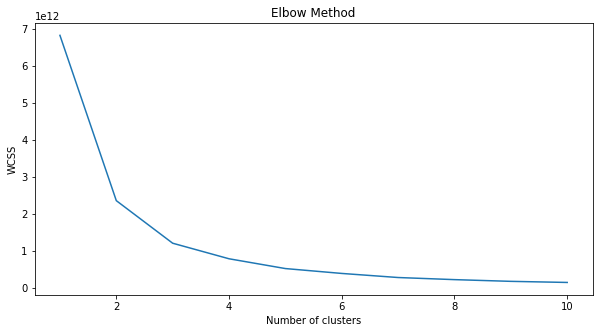

In [66]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# Choose the optimal number of clusters and apply K-Means
optimal_clusters = 3  # This is usually chosen based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(clustering_data)

In [70]:
# Add the cluster labels to the original dataframe
clustering_data['Cluster'] = clusters

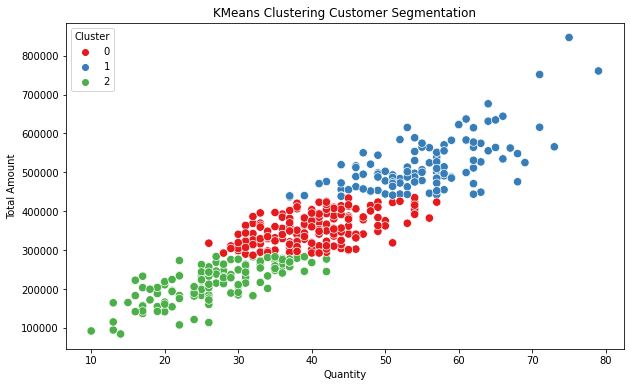

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='TotalAmount', data=clustering_data, hue='Cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

## Customer Segmentation

In [83]:
# Menghitung rata-rata Qty dan TotalAmount untuk setiap cluster
cluster_avg = clustering_data.groupby('Cluster').agg({
    'Qty': 'mean',
    'TotalAmount': 'mean'
}).reset_index()

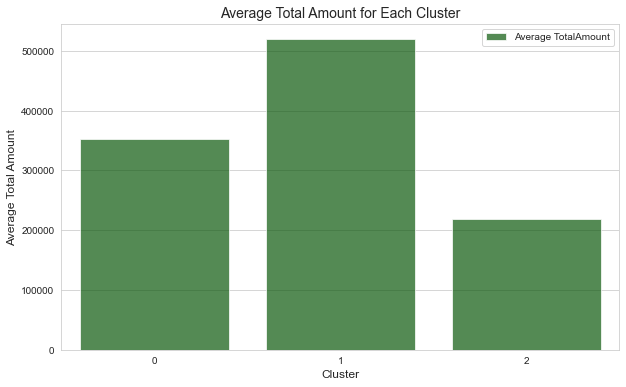

In [87]:
# Plot Average TotalAmount for Each Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='TotalAmount', data=cluster_avg, color='darkgreen', alpha=0.7, label='Average TotalAmount')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Total Amount', fontsize=12)
plt.title('Average Total Amount for Each Cluster', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

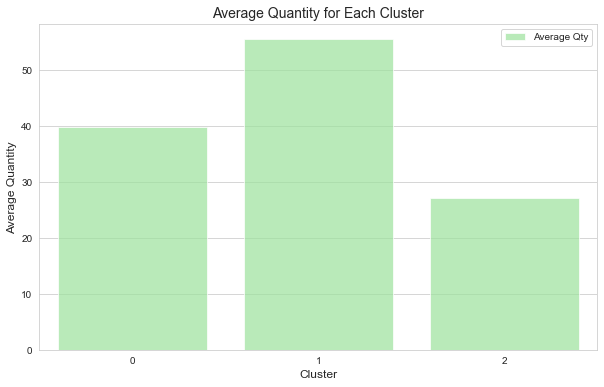

In [86]:
# Plot Average Quantity for Each Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Qty', data=cluster_avg, color='lightgreen', alpha=0.7, label='Average Qty')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Quantity', fontsize=12)
plt.title('Average Quantity for Each Cluster', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Karakteristik Pelanggan:
- Cluster 1: "Pelanggan Setia" dengan pembelian dan pengeluaran tertinggi.
- Cluster 0: "Potensial Pelanggan Setia" dengan pembelian dan pengeluaran di tengah-tengah.
- Cluster 2: "Pelanggan Baru" dengan pembelian dan pengeluaran terendah.

Rekomendasi Bisnis:
- Cluster 1: Mengembangkan program loyalitas, komunikasi rutin, dan survei kepuasan.
- Cluster 0: Menawarkan penawaran menarik, diskon, dan layanan pelanggan responsif.
- Cluster 2: Memberikan insentif khusus untuk pembelian pertama, tindak lanjut, dan program loyalitas untuk member baru.